In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import mpld3
%matplotlib inline
# mpld3.enable_notebook() # All mpld3 gives is pan and zoom, which isn't great. 
# Maybe when it gets more plugins I'll reconsider it
# 

In [2]:
rand = np.random.randint(100,200, size=30309)
df = pd.DataFrame(rand)

bins = [0,150,160,165,170,180,199,200]
countByBin =df.groupby(pd.cut(df[0], bins)).count()
countByBin["normalized"] = countByBin*100.0/countByBin.sum()
countByBin["cumsum"] = countByBin["normalized"].cumsum()

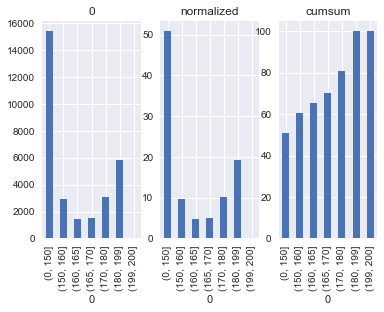

In [3]:
fig, axs = plt.subplots(ncols=len(countByBin.columns), nrows=1)
for iCol in range(3) : 
    countByBin.iloc[:,iCol].plot(kind="bar", title=f"{countByBin.columns[iCol]}",ax=axs[iCol])

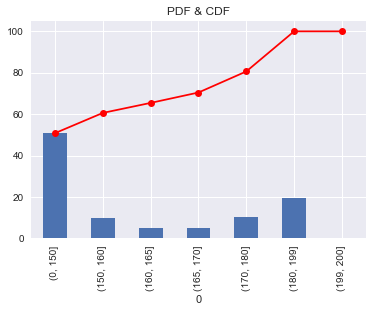

In [4]:
#countByBin["normalized;cumsum".split(";")].plot(kind="bar")
fig = plt.figure()
ax = countByBin["normalized"].plot(kind="bar")
ax.plot(countByBin["cumsum"].values, color='red', marker="o") #TBD have one one scale

# To have seperate y axis, start by twinning the axis, and then 
# plotting on the twin  - e.g.
# ax2 = ax.twinx()
# ax2.plot (...)
ax.set_title("PDF & CDF")

# It'd be great if these plugins work - but they don't seem to.
# tt1 = mpld3.plugins.LineLabelTooltip(ax, label='l1')
# mpld3.plugins.connect(fig, tt1)


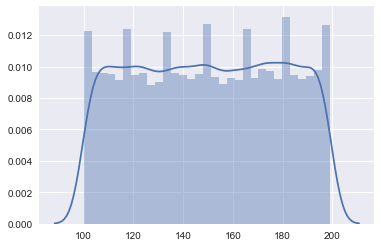

In [5]:
# normalized
# pdf
sns.distplot(df)

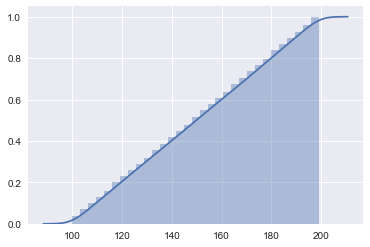

In [6]:
# cdf
sns.distplot(df, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

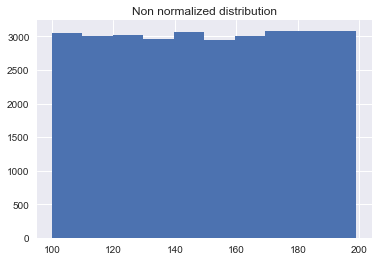

In [7]:
plt.hist(df)
plt.title("Non normalized distribution")